In [1]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Set working directory
%cd /content/drive/MyDrive/FDA/

/content/drive/MyDrive/FDA


In [42]:
# Include Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from tabulate import tabulate

#Remove/Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

#**Task - 1. Loading the urban navigation data set (Table 1)**

In [43]:
# Read Urban Spatial data
df_urban = pd.read_csv('Table_1.csv')
df_urban.head()

,Region,City,φ,Η\n \n o,Η\n \n w,ĩ,ς,k̅,P\n \n de,P\n \n 4w
0,Asia/Oceania,Bangkok,0.105,3.465,3.452,64.6,1.059,2.385,0.360,0.108
1,Asia/Oceania,Beijing,0.335,3.177,3.206,177.5,1.053,2.985,0.135,0.241
2,Asia/Oceania,Hanoi,0.010,3.573,3.572,64.4,1.065,2.610,0.246,0.102
3,Asia/Oceania,Hong Kong,0.012,3.571,3.563,61.0,1.137,2.932,0.114,0.174
4,Asia/Oceania,Jakarta,0.167,3.391,3.347,52.8,1.065,2.741,0.175,0.096


In [44]:
#Viewing the column names
df_urban.columns

Index(['Region', 'City', 'φ',
       'Η\n                            \n                            o',
       'Η\n                            \n                            w', 'ĩ',
       'ς', 'k̅',
       'P\n                            \n                            de',
       'P\n                            \n                            4w'],
      dtype='object')

#**Task -3. Preprocessing the data such as normalizing or scaling the features**


**Naming Conventions**

φ - orientation_order,

Ηo - street_orientation,

Ηw - wt_street_orientation,

ĩ - median_street_length (meters),

ς - average_circuity,

k̅ - average_node_degree,

Pde - deadends_proportion,

P4w four_way_intersections

In [45]:
#Renaming the columns
df_urban = df_urban.rename(columns={'φ':'orientation_order', \
                       'Η\n                            \n                            o': 'street_orientation', \
                       'Η\n                            \n                            w': 'wt_street_orientation', \
                       'ĩ': 'median_street_length', \
                       'ς': 'average_circuity', \
                       'k̅': 'average_node_degree', \
                       'P\n                            \n                            de': 'deadends_proportion', \
                       'P\n                            \n                            4w': 'four_way_intersections'})

df_urban.head(3)

,Region,City,orientation_order,street_orientation,wt_street_orientation,median_street_length,average_circuity,average_node_degree,deadends_proportion,four_way_intersections
0,Asia/Oceania,Bangkok,0.105,3.465,3.452,64.6,1.059,2.385,0.360,0.108
1,Asia/Oceania,Beijing,0.335,3.177,3.206,177.5,1.053,2.985,0.135,0.241
2,Asia/Oceania,Hanoi,0.010,3.573,3.572,64.4,1.065,2.610,0.246,0.102


In [46]:
#Checking the data types for all the columns
df_urban.dtypes

Region                     object
City                       object
orientation_order         float64
street_orientation        float64
wt_street_orientation     float64
median_street_length      float64
average_circuity          float64
average_node_degree       float64
deadends_proportion       float64
four_way_intersections    float64
dtype: object

In [47]:
#Describing the dataframe to understand the shape of dataset's distribution
df_urban.describe()

,orientation_order,street_orientation,wt_street_orientation,median_street_length,average_circuity,average_node_degree,deadends_proportion,four_way_intersections
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.178790,3.351270,3.339230,82.990000,1.055980,2.923000,0.147580,0.228080
std,0.224408,0.323212,0.337918,27.941044,0.027253,0.264333,0.080086,0.126133
min,0.002000,2.083000,2.103000,23.200000,1.011000,2.348000,0.027000,0.061000
25%,0.024000,3.244250,3.233500,64.550000,1.036750,2.710750,0.083750,0.138250
50%,0.062000,3.514500,3.495500,80.650000,1.052500,2.947500,0.130500,0.191000
75%,0.284750,3.557000,3.553250,97.125000,1.073000,3.107750,0.204250,0.309500
max,0.899000,3.582000,3.581000,233.000000,1.148000,3.548000,0.395000,0.576000


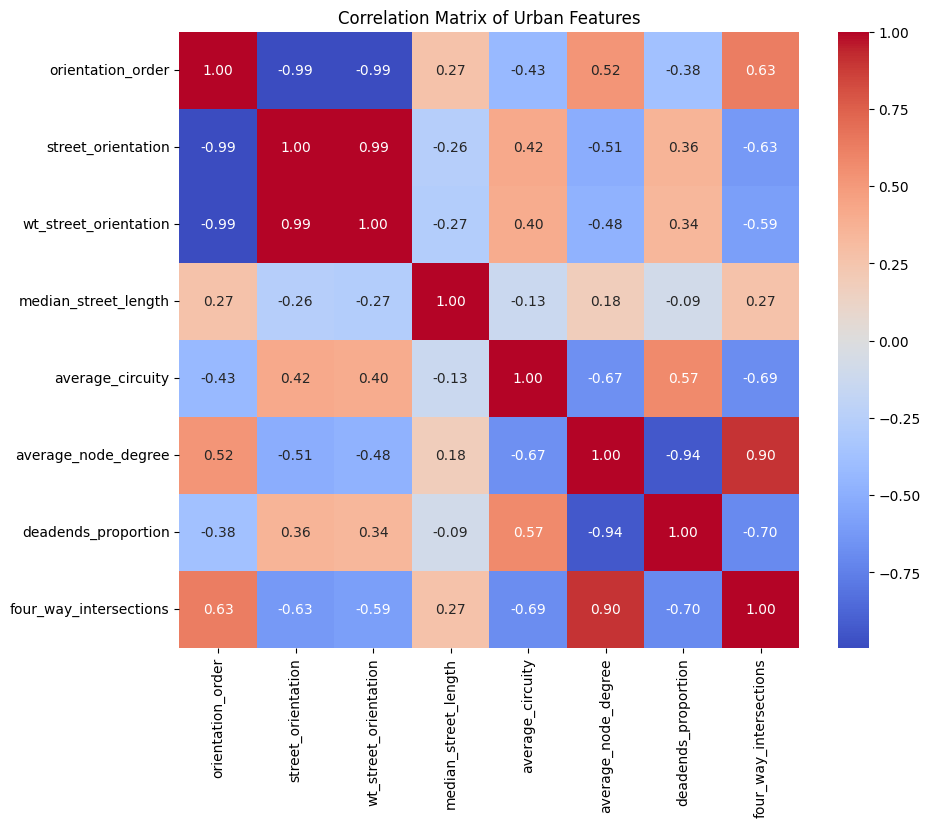

In [48]:
#Variable selection
#Finding correlation between features and removing the highly correlated features

columns_of_interest = ['orientation_order', 'street_orientation', 'wt_street_orientation', 'median_street_length',
                      'average_circuity', 'average_node_degree', 'deadends_proportion', 'four_way_intersections']

# Selecting only the columns of interest
df_subset = df_urban[columns_of_interest]

# Calculating correlation matrix
correlation_matrix = df_subset.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Urban Features')
plt.show()

Based on the above correlation matrix,

1)  **'street_orientation'**and **'wt_street_orientation'** seems like to be highly correlated with value of 0.99


So dropping 'wt_street_orientation' and 'four_way_intersections'

In [13]:
#Displaying all the rows and columns in a dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Renaming the columns
df_final = df_urban.rename(columns={0:'orientation_order', \
                       1: 'street_orientation', \
                       2: 'median_street_length', \
                       3: 'average_circuity', \
                       4: 'average_node_degree', \
                       5: 'deadends_proportion',\
                       6: 'four_way_intersections'
                  })
numerical_columns = ['orientation_order','street_orientation', 'median_street_length',	'average_circuity',	'average_node_degree', 'deadends_proportion', 'four_way_intersections']
df_final = df_final[numerical_columns]
df_final.head(3)

,orientation_order,street_orientation,median_street_length,average_circuity,average_node_degree,deadends_proportion,four_way_intersections
0,0.105,3.465,64.6,1.059,2.385,0.360,0.108
1,0.335,3.177,177.5,1.053,2.985,0.135,0.241
2,0.010,3.573,64.4,1.065,2.610,0.246,0.102


#**MinMaxScaler Scaling Normalization**




In [50]:
#Normalizing the dataset using MinMax Scaling technique
scaler = MinMaxScaler()
df_final.head(1)

,orientation_order,street_orientation,median_street_length,average_circuity,average_node_degree,deadends_proportion,four_way_intersections,hierarchical_cluster,kmeans_3
0,0.114827,0.921948,0.197331,0.350365,0.030833,0.904891,0.091262,1,1


In [51]:
df_final = scaler.fit_transform(df_final[numerical_columns])
df_final = pd.DataFrame(df_final)
df_final.head(3)


,0,1,2,3,4,5,6
0,0.114827,0.921948,0.197331,0.350365,0.030833,0.904891,0.091262
1,0.371237,0.729820,0.735462,0.306569,0.530833,0.293478,0.349515
2,0.008919,0.993996,0.196378,0.394161,0.218333,0.595109,0.079612


In [52]:
df_final = df_final.rename(columns={0:'orientation_order', \
                       1: 'street_orientation', \
                       2: 'median_street_length', \
                       3: 'average_circuity', \
                       4: 'average_node_degree', \
                       5: 'deadends_proportion',\
                       6: 'four_way_intersections'
                  })
df_final = df_final[numerical_columns]
df_final.head(3)


,orientation_order,street_orientation,median_street_length,average_circuity,average_node_degree,deadends_proportion,four_way_intersections
0,0.114827,0.921948,0.197331,0.350365,0.030833,0.904891,0.091262
1,0.371237,0.729820,0.735462,0.306569,0.530833,0.293478,0.349515
2,0.008919,0.993996,0.196378,0.394161,0.218333,0.595109,0.079612


#**Task - 4. Find out why we need to maintain a uniform scale across the variables for K-means and Hierarchical clustering**


Answer: Maintaining a uniform scale across variables is crucial for both K-means and Hierarchical clustering to ensure fair comparison and accurate clustering results.

In clustering algorithms, distances between data points are used to determine cluster assignments.

If the variables have different scales, those with larger magnitudes can dominate the distance calculations, leading to biased clustering results.

Normalizing or scaling the variables to a uniform range ensures that each variable contributes equally to the distance calculations, allowing for a more balanced and meaningful analysis of the dataset.

Thus, maintaining a uniform scale facilitates a fair comparison between variables and improves the reliability of the clustering outcomes.

#**Task - 5. Do we need to use scaling techniques for this dataset?**

Answer: Yes. Because median_street_length ranges from 23.2 to 233.

This difference in scale could affect the clustering results.



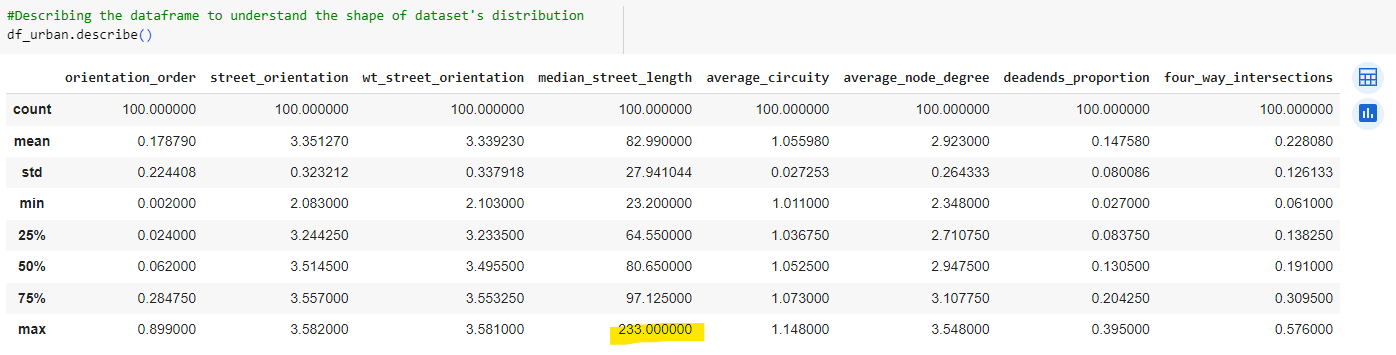

#**Task - 6 & 7. Implementing K-means clustering to categorize the data into clusters & Use elbow method to determine number of clusters**

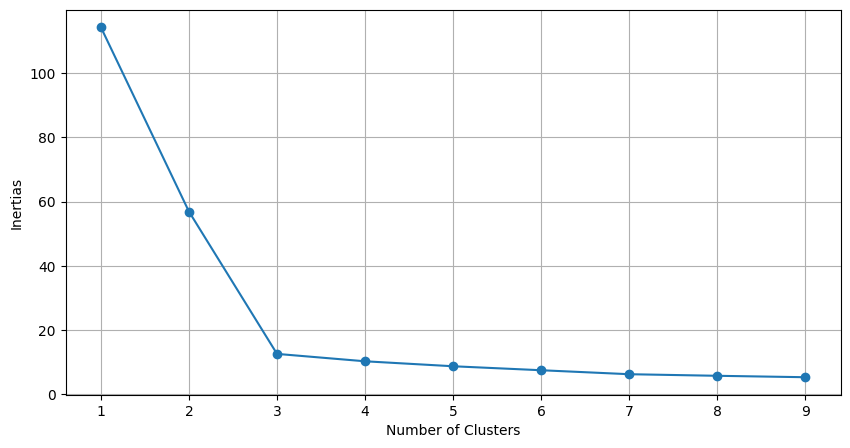

In [66]:
#Determining the number of clusters

def optimize_k_means(data, max_k):
  means = []
  inertias = []
  for k in range(1, max_k):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(data)
    means.append(k)
    inertias.append(kmeans.inertia_)
  return means, inertias
data = df_final
max_k = 10
means, inertias = optimize_k_means(data, max_k)

#Generate Elbow Plot
plt.figure(figsize=(10, 5))  # Corrected method name
plt.plot(means,inertias,'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertias')
plt.grid(True)
plt.show()

**Based on the elbow plot, Number of clusters chosen is 3.**

In [69]:
#Adding a new column named 'kmeans_3' to denote there are 3 clusters 0, 1 and 2.
#Each record will be assigned to only one cluster
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_final)
df_final['kmeans_3'] = kmeans.labels_
df_final.head()

,orientation_order,street_orientation,median_street_length,average_circuity,average_node_degree,deadends_proportion,four_way_intersections,kmeans_3,hierarchical_cluster
0,0.114827,0.921948,0.197331,0.350365,0.030833,0.904891,0.091262,1,1
1,0.371237,0.729820,0.735462,0.306569,0.530833,0.293478,0.349515,2,0
2,0.008919,0.993996,0.196378,0.394161,0.218333,0.595109,0.079612,1,1
3,0.011148,0.992662,0.180172,0.919708,0.486667,0.236413,0.219417,1,1
4,0.183946,0.872582,0.141087,0.394161,0.327500,0.402174,0.067961,1,1


#**Task -8. Implement Hierarchical clustering using an appropriate linkage method**






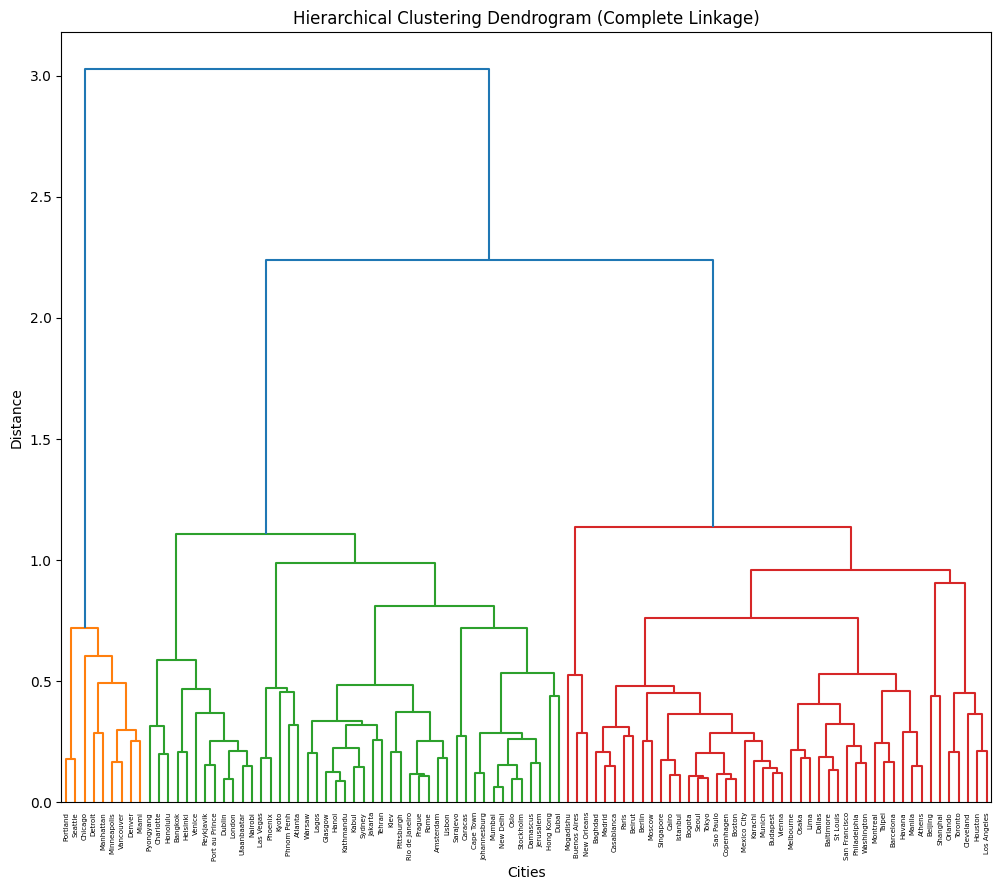

In [65]:
# Plotting the dendrogram to visualize the tree-based structure
plt.figure(figsize=(12, 10))
dendrogram((linkage(df_final, method='complete')), labels=df_urban['City'].values, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)')
plt.xlabel('Cities')
plt.ylabel('Distance')
plt.show()


**Based on the above Dendrogram, the number of clusters chosen is 3**



#**Task - 9 & 10. Try all the linkage criteria & Plotting the dendogram for each criteria**


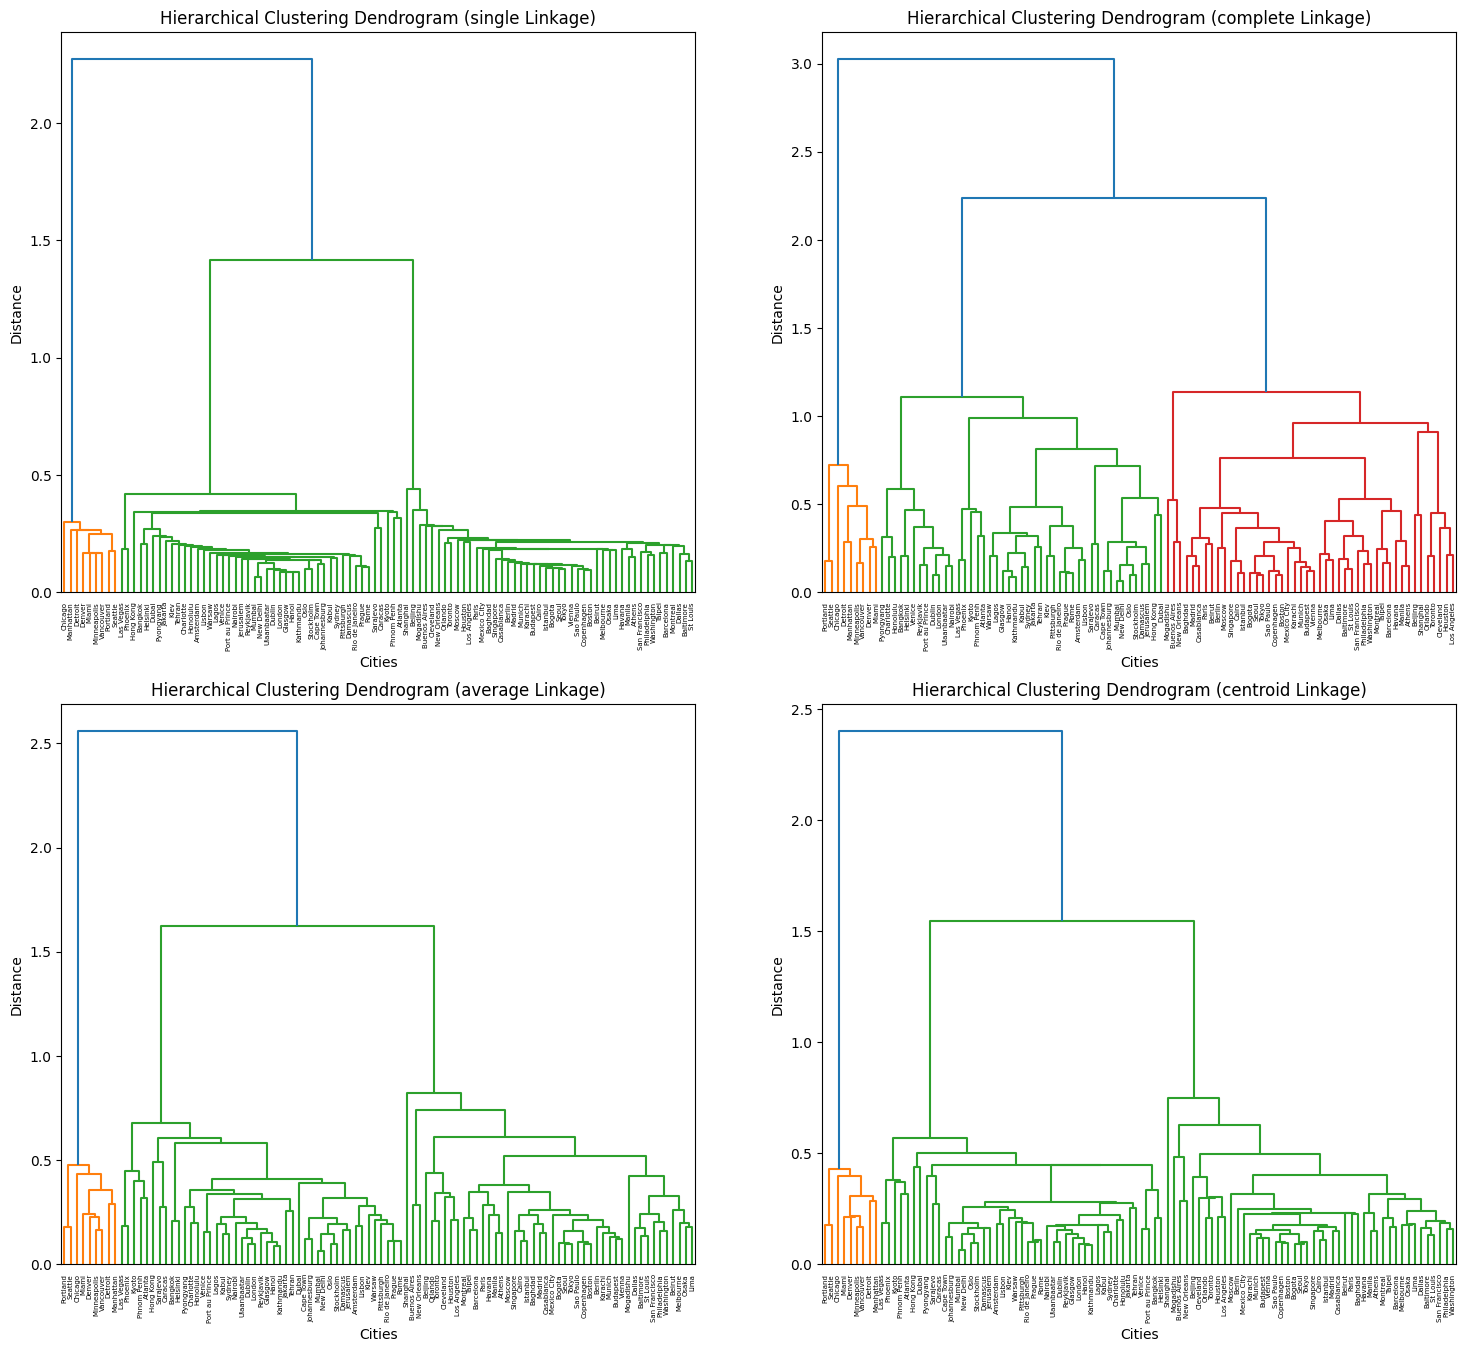

In [63]:
# Plot dendrogram
plt.figure(figsize=(18, 16))
methods= ['single', 'complete', 'average', 'centroid']
num_methods = len(methods)

# Create subplots
for i, method in enumerate(methods, 1):
  plt.subplot(2, 2, i)
  Z = linkage(df_final, method = method)
  dendrogram(Z, labels=df_urban['City'].values)
  plt.title(f'Hierarchical Clustering Dendrogram ({method} Linkage)')
  plt.xlabel('Cities')
  plt.ylabel('Distance')

**Based on the above Dendrogram, complete is the preferred method**



In [70]:
from sklearn.cluster import AgglomerativeClustering

# Perform hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical.fit(df_final)
# Add a new column with hierarchical clustering results
df_final['hierarchical_cluster'] = hierarchical.labels_

# Display the DataFrame with the new column
df_final = pd.DataFrame(df_final)
df_final.head(10)


,orientation_order,street_orientation,median_street_length,average_circuity,average_node_degree,deadends_proportion,four_way_intersections,kmeans_3,hierarchical_cluster
0,0.114827,0.921948,0.197331,0.350365,0.030833,0.904891,0.091262,1,1
1,0.371237,0.729820,0.735462,0.306569,0.530833,0.293478,0.349515,2,0
2,0.008919,0.993996,0.196378,0.394161,0.218333,0.595109,0.079612,1,1
3,0.011148,0.992662,0.180172,0.919708,0.486667,0.236413,0.219417,1,1
4,0.183946,0.872582,0.141087,0.394161,0.327500,0.402174,0.067961,1,1
5,0.082497,0.944630,0.267398,0.372263,0.270833,0.540761,0.133981,1,1
6,0.095875,0.935290,0.229266,0.153285,0.565833,0.184783,0.300971,2,0
7,0.057971,0.960640,0.191134,0.437956,0.205833,0.562500,0.054369,1,1
8,0.395764,0.710474,0.125834,0.576642,0.449167,0.290761,0.186408,1,1
9,0.066890,0.954636,0.192088,0.087591,0.660833,0.184783,0.555340,2,0


#**Task - 11. For aforementioned methods generate the clustering solution. The clustering solution simply groups the counties into different groups based on similarity.**


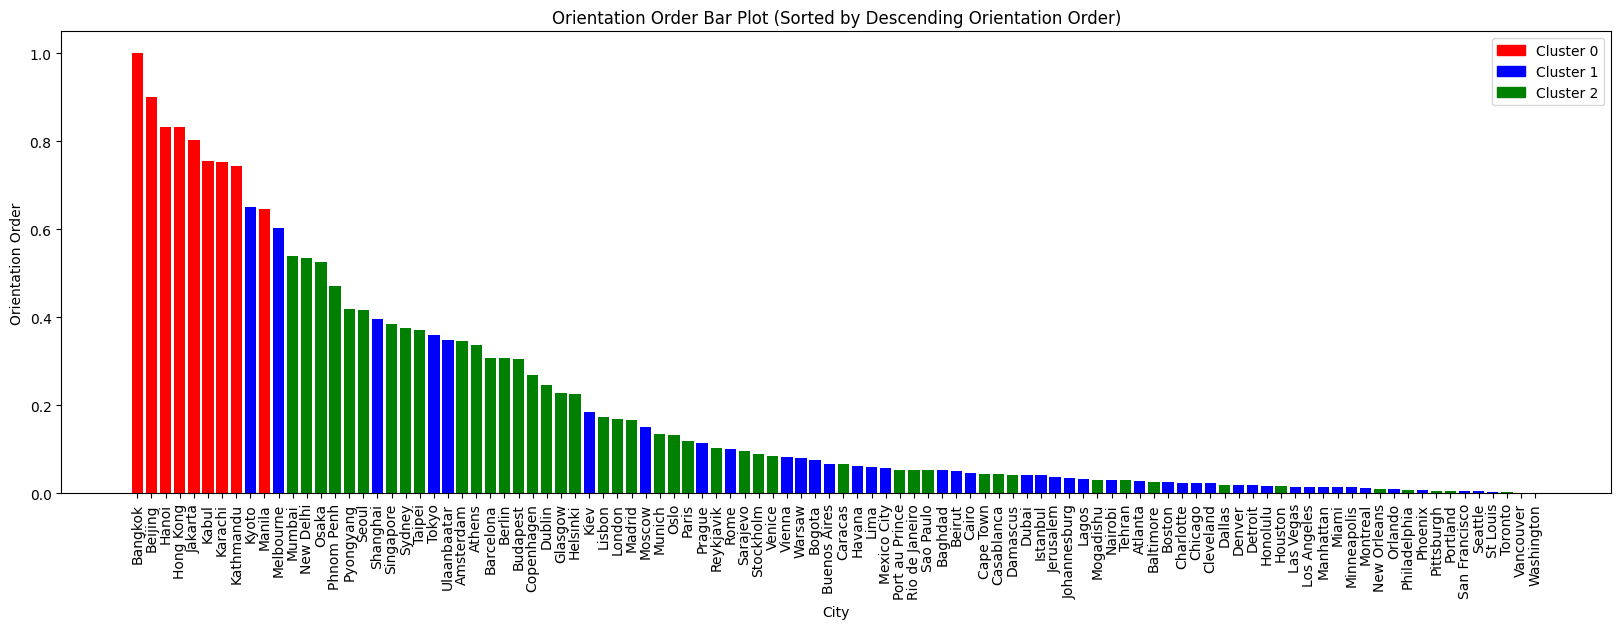

In [71]:
import matplotlib.pyplot as plt

# Sort the data by street_orientation in descending order
data_sorted = df_final.sort_values(by = 'orientation_order', ascending = False)

# Create a bar plot
plt.figure(figsize=(20, 6))
plt.bar(df_urban['City'], data_sorted['orientation_order'], color=data_sorted['kmeans_3'].map({0: 'red', 1: 'blue', 2: 'green'}))
plt.xlabel('City')
plt.ylabel('Orientation Order')
plt.title('Orientation Order Bar Plot (Sorted by Descending Orientation Order)')
plt.xticks(rotation=90)

# Create legend
legend_colors = {'Cluster 0': 'red', 'Cluster 1': 'blue', 'Cluster 2': 'green'}
legend_labels = [plt.Rectangle((0,0),1,1, color=color) for color in legend_colors.values()]
plt.legend(legend_labels, legend_colors.keys())

plt.show()


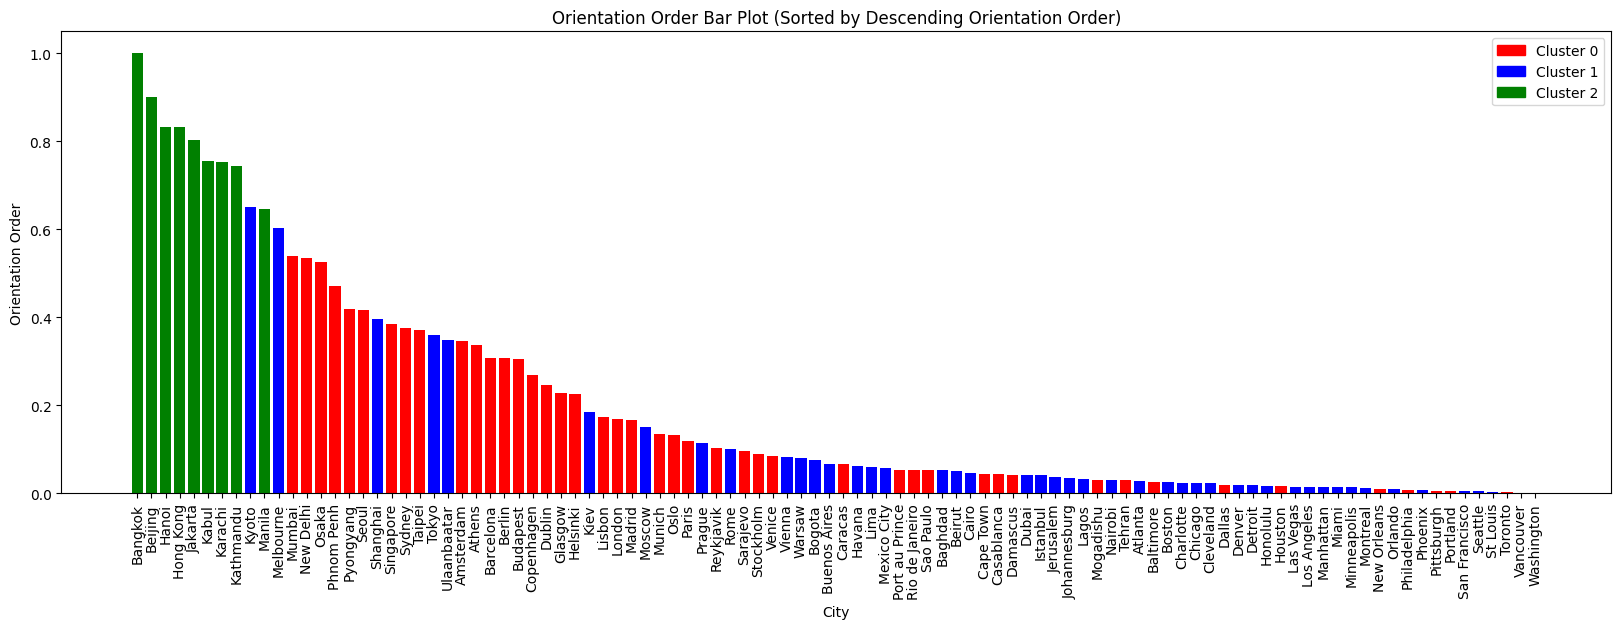

In [73]:
import matplotlib.pyplot as plt

# Sort the data by street_orientation in descending order
data_sorted = df_final.sort_values(by = 'orientation_order', ascending = False)

# Create a bar plot
plt.figure(figsize=(20, 6))
plt.bar(df_urban['City'], data_sorted['orientation_order'], color=data_sorted['hierarchical_cluster'].map({0: 'red', 1: 'blue', 2: 'green'}))
plt.xlabel('City')
plt.ylabel('Orientation Order')
plt.title('Orientation Order Bar Plot (Sorted by Descending Orientation Order)')
plt.xticks(rotation=90)

# Create legend
legend_colors = {'Cluster 0': 'red', 'Cluster 1': 'blue', 'Cluster 2': 'green'}
legend_labels = [plt.Rectangle((0,0),1,1, color=color) for color in legend_colors.values()]
plt.legend(legend_labels, legend_colors.keys())

plt.show()


#**Task - 12. Investigation and Insights**


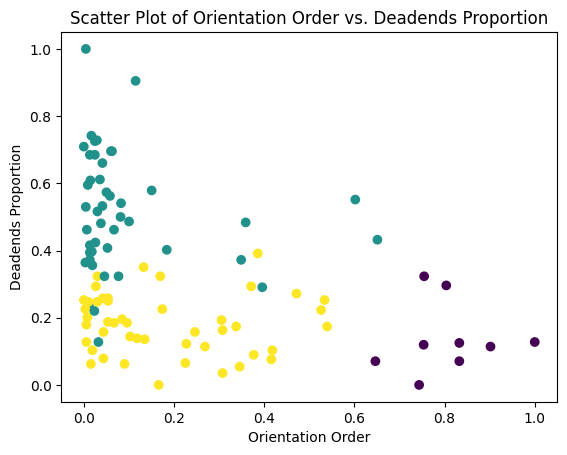

In [106]:
# Scatter plot
plt.scatter(x=df_final['orientation_order'], y=df_final['deadends_proportion'], c=df_final['kmeans_3'])

# Add labels and title
plt.xlabel('Orientation Order')
plt.ylabel('Deadends Proportion')
plt.title('Scatter Plot of Orientation Order vs. Deadends Proportion')

# Show the plot
plt.show()

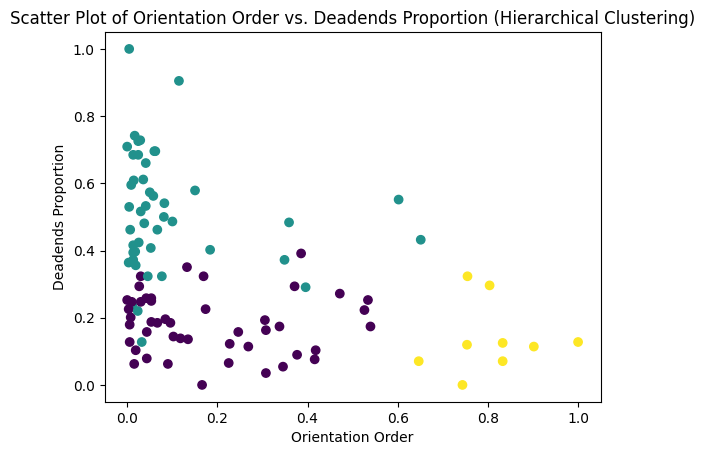

In [107]:
# Scatter plot
plt.scatter(x=df_final['orientation_order'], y=df_final['deadends_proportion'], c=df_final['hierarchical_cluster'])

# Add labels and title
plt.xlabel('Orientation Order')
plt.ylabel('Deadends Proportion')
plt.title('Scatter Plot of Orientation Order vs. Deadends Proportion (Hierarchical Clustering)')

# Show the plot
plt.show()

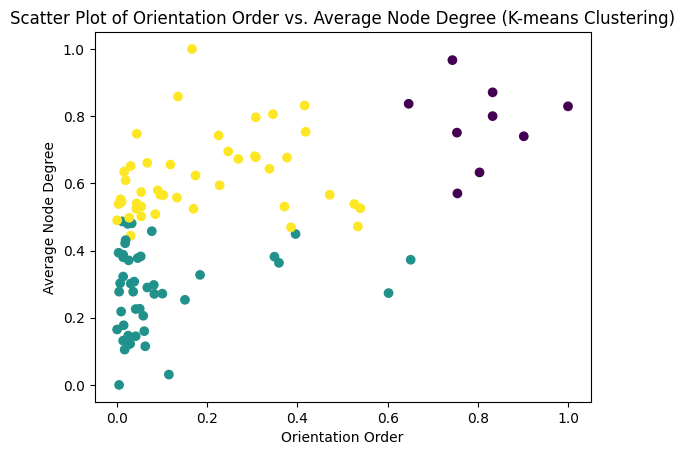

In [108]:
# Scatter plot
plt.scatter(x=df_final['orientation_order'], y=df_final['average_node_degree'], c=df_final['kmeans_3'])

# Add labels and title
plt.xlabel('Orientation Order')
plt.ylabel('Average Node Degree')
plt.title('Scatter Plot of Orientation Order vs. Average Node Degree (K-means Clustering)')

# Show the plot
plt.show()

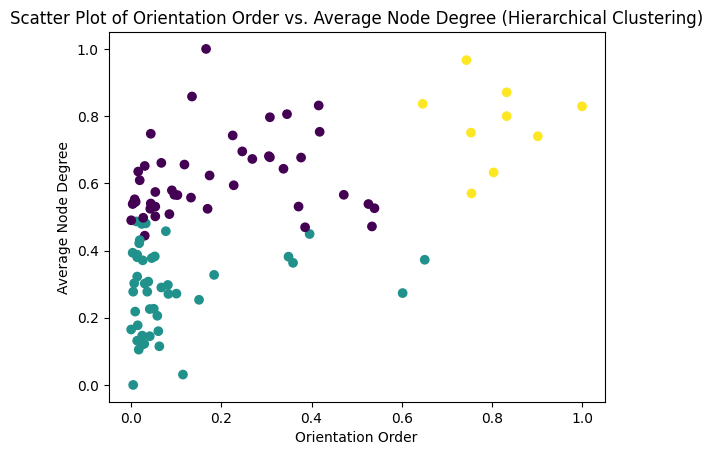

In [109]:
# Scatter plot
plt.scatter(x=df_final['orientation_order'], y=df_final['average_node_degree'], c=df_final['hierarchical_cluster'])

# Add labels and title
plt.xlabel('Orientation Order')
plt.ylabel('Average Node Degree')
plt.title('Scatter Plot of Orientation Order vs. Average Node Degree (Hierarchical Clustering)')

# Show the plot
plt.show()

In [105]:
merged_data = pd.merge(left=df_urban[['Region','City']], right=df_final, left_index=True, right_index=True, how='left')
merged_data.head(3)


,Region,City,orientation_order,street_orientation,median_street_length,average_circuity,average_node_degree,deadends_proportion,four_way_intersections,kmeans_3,hierarchical_cluster
0,Asia/Oceania,Bangkok,0.114827,0.921948,0.197331,0.350365,0.030833,0.904891,0.091262,1,1
1,Asia/Oceania,Beijing,0.371237,0.729820,0.735462,0.306569,0.530833,0.293478,0.349515,2,0
2,Asia/Oceania,Hanoi,0.008919,0.993996,0.196378,0.394161,0.218333,0.595109,0.079612,1,1


#**Cluster 0: Highly-Ordered and Grid-Like Street Networks in North American Cities**

**Regions:** Asia/Oceania, Europe, Latin America, Middle East/Africa, US/Canada

For cluster 0, the cities included are Chicago, Denver, Detroit, Manhattan, Miami, Minneapolis, Portland, Seattle, and Vancouver.

All of these cities belong to the US/Canada region.

The values in the columns provide insights into the characteristics of the street networks in these cities.

**For example**, cities like Manhattan and Miami have high orientation order values, indicating a high level of spatial order or grid-like structure in their street networks.

On the other hand, cities like Detroit and Portland have lower orientation order values, suggesting a more disordered or irregular street layout.

In [92]:
filtered_rows = merged_data[(merged_data['kmeans_3'] == 0) ]
filtered_rows

,Region,City,orientation_order,street_orientation,median_street_length,average_circuity,average_node_degree,deadends_proportion,four_way_intersections,kmeans_3,hierarchical_cluster
75,US/Canada,Chicago,1.000000,0.000000,0.391325,0.036496,0.829167,0.127717,0.866019,0,2
78,US/Canada,Denver,0.753623,0.367578,0.378932,0.145985,0.750833,0.119565,0.689320,0,2
79,US/Canada,Detroit,0.646600,0.482989,0.371783,0.007299,0.836667,0.070652,0.817476,0,2
84,US/Canada,Manhattan,0.743590,0.378252,0.281220,0.043796,0.966667,0.000000,0.992233,0,2
85,US/Canada,Miami,0.901895,0.172115,0.350334,0.087591,0.740000,0.114130,0.671845,0,2
86,US/Canada,Minneapolis,0.832776,0.268846,0.439466,0.087591,0.870833,0.070652,0.893204,0,2
93,US/Canada,Portland,0.754738,0.366244,0.280744,0.218978,0.570000,0.323370,0.516505,0,2
95,US/Canada,Seattle,0.803790,0.306204,0.352717,0.124088,0.632500,0.296196,0.598058,0,2
98,US/Canada,Vancouver,0.832776,0.270180,0.383699,0.080292,0.800000,0.125000,0.765049,0,2


#**Cluster 1: Diverse Street Networks: Average Ordered Orientations and Connectivity in Global Metropolitan Areas**

For cluster 1, the cities included span various regions, including Asia/Oceania, Europe, Latin America, and the Middle East/Africa. Some notable cities in this cluster are Bangkok, Hong Kong, Amsterdam, Dublin, Caracas, Damascus, and Cape Town.

The values in the columns offer insights into the characteristics of the street networks in these cities. For instance, cities like Bangkok and Hong Kong exhibit high street_orientation values, indicating a strong directional preference or organized street layouts. Conversely, cities like Damascus and Dublin have lower street_orientation values, suggesting a more varied or irregular street network.

Additionally, the **median_street_length** values vary across cities, with some cities like Hong Kong and Caracas having relatively shorter median street lengths, potentially reflecting higher street density and connectivity. Conversely, cities like Amsterdam and Dublin have slightly longer median street lengths, possibly indicating a more spacious or planned urban layout.

Furthermore, the **average_circuity** values provide insights into the curvature or directness of the streets. Cities with lower average circuity values, such as Hong Kong and London, may have more direct or efficient street layouts compared to cities with higher circuity values, like Damascus and Reykjavik.

Overall, the cities in cluster 1 exhibit diverse urban street network characteristics influenced by their geographical, cultural, and historical contexts. From densely packed Asian metropolises to historic European capitals and vibrant Latin American cities, each urban area contributes unique features to the cluster.





In [93]:
filtered_rows = merged_data[(merged_data['kmeans_3'] == 1) ]
filtered_rows

,Region,City,orientation_order,street_orientation,median_street_length,average_circuity,average_node_degree,deadends_proportion,four_way_intersections,kmeans_3,hierarchical_cluster
0,Asia/Oceania,Bangkok,0.114827,0.921948,0.197331,0.350365,0.030833,0.904891,0.091262,1,1
2,Asia/Oceania,Hanoi,0.008919,0.993996,0.196378,0.394161,0.218333,0.595109,0.079612,1,1
3,Asia/Oceania,Hong Kong,0.011148,0.992662,0.180172,0.919708,0.486667,0.236413,0.219417,1,1
4,Asia/Oceania,Jakarta,0.183946,0.872582,0.141087,0.394161,0.327500,0.402174,0.067961,1,1
5,Asia/Oceania,Kabul,0.082497,0.944630,0.267398,0.372263,0.270833,0.540761,0.133981,1,1
7,Asia/Oceania,Kathmandu,0.057971,0.960640,0.191134,0.437956,0.205833,0.562500,0.054369,1,1
8,Asia/Oceania,Kyoto,0.395764,0.710474,0.125834,0.576642,0.449167,0.290761,0.186408,1,1
11,Asia/Oceania,Mumbai,0.081382,0.944630,0.217827,0.510949,0.297500,0.500000,0.145631,1,1
12,Asia/Oceania,New Delhi,0.066890,0.955304,0.187321,0.525547,0.290000,0.461957,0.112621,1,1
14,Asia/Oceania,Phnom Penh,0.358974,0.740494,0.278360,0.211679,0.363333,0.483696,0.246602,1,1


#**Cluster 2: Diverse Urban Landscapes**
**Regions:** Asia/Oceania, Europe, Latin America, the Middle East/Africa, and the US/Canada

Cluster 2 encompasses cities from diverse regions and cities like Beijing, Melbourne, Paris, Mexico City, and Los Angeles.

Insights from the data show variations in street network characteristics. Cities like Tokyo and Seoul have organized layouts with high orientation_order values, while others like Istanbul and Mogadishu exhibit more irregular networks. Median_street_length varies, with Barcelona having longer streets compared to Manila. Similarly, average_circuity values indicate the efficiency of street layouts, with Melbourne and Athens having lower values than Baghdad and Orlando.

In summary, cluster 2 cities display a range of urban planning styles influenced by geography, culture, and history, reflecting unique aspects of each city's development.

In [94]:
filtered_rows = merged_data[(merged_data['kmeans_3'] == 2) ]
filtered_rows

,Region,City,orientation_order,street_orientation,median_street_length,average_circuity,average_node_degree,deadends_proportion,four_way_intersections,kmeans_3,hierarchical_cluster
1,Asia/Oceania,Beijing,0.371237,0.729820,0.735462,0.306569,0.530833,0.293478,0.349515,2,0
6,Asia/Oceania,Karachi,0.095875,0.935290,0.229266,0.153285,0.565833,0.184783,0.300971,2,0
9,Asia/Oceania,Manila,0.066890,0.954636,0.192088,0.087591,0.660833,0.184783,0.555340,2,0
10,Asia/Oceania,Melbourne,0.376812,0.726484,0.136797,0.189781,0.676667,0.089674,0.526214,2,0
13,Asia/Oceania,Osaka,0.268673,0.810540,0.132507,0.102190,0.672500,0.114130,0.448544,2,0
16,Asia/Oceania,Seoul,0.007804,0.993996,0.144423,0.270073,0.552500,0.201087,0.279612,2,0
17,Asia/Oceania,Shanghai,0.132664,0.909940,1.000000,0.211679,0.557500,0.350543,0.497087,2,0
18,Asia/Oceania,Singapore,0.003344,0.997332,0.197807,0.481752,0.538333,0.225543,0.299029,2,0
20,Asia/Oceania,Taipei,0.173913,0.879920,0.239752,0.416058,0.623333,0.225543,0.473786,2,0
21,Asia/Oceania,Tokyo,0.053512,0.963976,0.125834,0.255474,0.501667,0.250000,0.242718,2,0
